# __Prepare data for training__

### __Sine / cosine transformation of time features__

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

import warnings
warnings.simplefilter('ignore')

#### __Linear time representation__

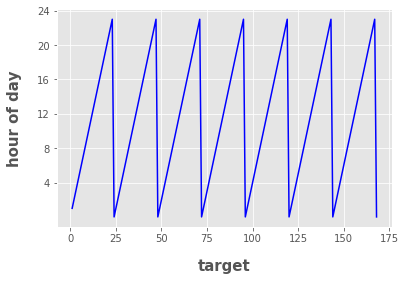

In [39]:
rcParams['figure.figsize'] = 6,4
plt.style.use('ggplot')

x = range(1, 169)
y = pd.date_range(start=dt.datetime(2018,6,1,1,0,0), end=dt.datetime(2018,6,8,0,0,0), freq='H')

fig = sns.lineplot(x=x, y=index.hour, color='blue')

plt.xlabel('target', labelpad=15, fontsize=15, fontweight='bold')
plt.ylabel('hour of day', labelpad=15, fontsize=15, fontweight='bold')

plt.yticks(ticks=[4, 8, 12, 16, 20, 24]);

The linear time representation does not account for any time proximity of e.g. hour 23 and hour 2. To any machine learning algotrithm, these two points apart far apart from each other.

#### __Periodic time representation__

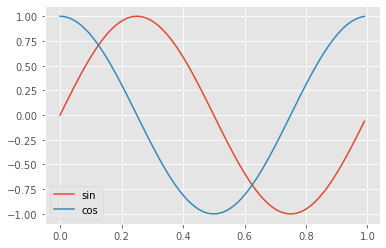

In [5]:
rcParams['figure.figsize'] = 6,4
plt.style.use('ggplot')

X = np.arange(0,1,0.01)

y_sin = np.sin(2 * np.pi*X)
y_cos = np.cos(2 * np.pi*X)

sns.lineplot(X,y_sin,label="sin");
sns.lineplot(X,y_cos,label="cos");

#file_path = '{}/Desktop/Portfolio_project/presentation/cyclical_time.png'.format(os.environ['HOME'])
#plt.savefig(file_path)

If only a sine OR cosine transformation is done, within one period always two target values would be acribed to the same sine OR cosine value. Hence, always a combined sine / cosine transformation is necessary (see below).

Text(0, 0.5, 'sin(x)')

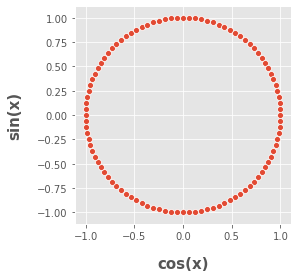

In [3]:
fig = sns.scatterplot(y_sin, y_cos).set_aspect('equal')

plt.xlabel('cos(x)', labelpad=15, fontsize=15, fontweight='bold')
plt.ylabel('sin(x)', labelpad=15, fontsize=15, fontweight='bold')

The sine / cosine transformation does not only consier for the periodicity of time (i.e. hour 23 and hour 2 are in fact in close proximity) but it also reduced the dimensionality from 24 hours to one single sine value and one single cosine value.

### __Exercise 1__
Perform a sine / cosine transformation on all time features which are relevant to our training. For that, write a function which takes our dataframe "df" as an input and again returns our processed dataframe as an output.

### __Your solution 1:__

In [4]:
def time_columns(df):
    
    #place your code here
    
    return df

In [11]:
df = pd.read_pickle('../data/train_clean.pkl')
df.head()

,t CO2-e / MWh
2009-07-01 04:00:00,0.991217
2009-07-01 04:05:00,0.000000
2009-07-01 04:10:00,0.000000
2009-07-01 04:15:00,0.991217
2009-07-01 04:20:00,1.025701


In [12]:
df = time_columns(df)

In [13]:
df.head()

,t CO2-e / MWh,year,minute_sin,minute_cos,hour_sin,hour_cos,weekday_sin,month_sin,month_cos
2009-07-01 04:00:00,0.991217,2009,0.000000,1.000000e+00,0.866025,0.5,0.0,-0.5,-0.866025
2009-07-01 04:05:00,0.000000,2009,0.500000,8.660254e-01,0.866025,0.5,0.0,-0.5,-0.866025
2009-07-01 04:10:00,0.000000,2009,0.866025,5.000000e-01,0.866025,0.5,0.0,-0.5,-0.866025
2009-07-01 04:15:00,0.991217,2009,1.000000,2.832769e-16,0.866025,0.5,0.0,-0.5,-0.866025
2009-07-01 04:20:00,1.025701,2009,0.866025,-5.000000e-01,0.866025,0.5,0.0,-0.5,-0.866025


### __Using lagging for target prediction__

### __Lagging__
Also known as "backshifting", lagging notation reflects the value of $y$ at a prior point in time. This is a useful technique for performing <em>regressions</em> as we'll see in upcoming sections.

\begin{split}L{y_t} = y_{t-1} & \text{      one lag shifts the data back one period}\\
L^{2}{y_t} = y_{t-2} & \text{      two lags shift the data back two periods} \end{split}
<br><br>
<table>
<tr><td>$y_t$</td><td>6</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-1}$</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-2}$</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
</table>

### __Lagging example__

Below you see an example of lagging. Here, lag1 to lag12 represent $y_{t-1}$ to $y_{t-12}$. The horizon0 values column represents the target values. Can you find the first value of horizon0 anywhere else in the dataframe?
<br/>
<br/>
<img src="../images/lags_example.png"> <br/>

### __Exercise 2__
Write a function which takes our dataframe as an input together with a specified lag and horizon. The function shall return our processed dataframe as an output.

### __Your solution 2:__

In [51]:
def lag_horizon(df, lag, horizon):
    
    #place your code here
        
    return df

In [15]:
df = lag_horizon(df, 12, 0)

In [49]:
file_path = '../data/train_time_features.pkl'
df.to_pickle(file_path)